In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from candy import Candy
from analysis import *
from torch.utils.data import random_split
import matplotlib.pyplot as plt


pygame 2.6.1 (SDL 2.28.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
raw = get_df_from_board_files()

In [3]:
# Create a list of dictionaries with the boards and scores
data = [{'board': state_to_board(state, 7, 7).board, 'score': score} for state, score in zip(raw["state"], raw["Move_1_Q"])]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data, columns=['board', 'score'])

In [10]:
import pandas as pd
import numpy as np
import itertools


def swap_candy_ids(board, id1, id2):
    """Swap all instances of id1 with id2 in the board."""
    swapped_board = board.copy()
    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            if board[i, j].id == id1:
                swapped_board[i, j] = Candy(id2)
            elif board[i, j].id == id2:
                swapped_board[i, j] = Candy(id1)
    return swapped_board

def apply_symmetry(board):
    """Apply symmetry along the y-axis."""
    return np.flip(board, axis=1)

def augment_data(board, candy_ids):
    """Generate augmented data by swapping candy IDs and applying symmetry."""
    augmented_boards = []
    # Generate all pair swaps
    for id1, id2 in itertools.combinations(candy_ids, 2):
        swapped_board = swap_candy_ids(board, id1, id2)
        augmented_boards.append(swapped_board)
        # Apply symmetry to each swapped board
        symmetric_board = apply_symmetry(swapped_board)
        augmented_boards.append(symmetric_board)
    return augmented_boards

# Expand DataFrame with augmented data
# Example usage with DataFrame
candy_ids = [1, 2, 3, 4, 5, 6]

augmented_data = []
for index, row in df.iloc[:100].iterrows():
    board = row['board']
    score = row['score']
    augmented_boards = augment_data(board, candy_ids)
    for aug_board in augmented_boards:
        augmented_data.append({'board': aug_board, 'score': score})

augmented_df = pd.DataFrame(augmented_data, columns=['board', 'score'])
print(augmented_df)

                                                  board        score
0     [[3, 2, 5, 2, 4, 4, 2], [1, 4, 4, 2, 4, 2, 2],...   818.867495
1     [[2, 4, 4, 2, 5, 2, 3], [2, 2, 4, 2, 4, 4, 1],...   818.867495
2     [[1, 3, 5, 3, 4, 4, 3], [2, 4, 4, 3, 4, 3, 3],...   818.867495
3     [[3, 4, 4, 3, 5, 3, 1], [3, 3, 4, 3, 4, 4, 2],...   818.867495
4     [[3, 4, 5, 4, 1, 1, 4], [2, 1, 1, 4, 1, 4, 4],...   818.867495
...                                                 ...          ...
2995  [[1, 4, 6, 1, 3, 2, 3], [5, 1, 2, 6, 2, 5, 2],...  1165.989079
2996  [[3, 2, 3, 1, 4, 5, 1], [2, 6, 2, 4, 2, 1, 6],...  1165.989079
2997  [[1, 5, 4, 1, 3, 2, 3], [6, 1, 2, 4, 2, 6, 2],...  1165.989079
2998  [[3, 2, 3, 1, 5, 6, 1], [2, 4, 2, 5, 2, 1, 4],...  1165.989079
2999  [[1, 6, 5, 1, 3, 2, 3], [4, 1, 2, 5, 2, 4, 2],...  1165.989079

[3000 rows x 2 columns]


In [13]:
df.iloc[0]['board']

array([[Candy(3), Candy(1), Candy(5), Candy(1), Candy(4), Candy(4),
        Candy(1)],
       [Candy(2), Candy(4), Candy(4), Candy(1), Candy(4), Candy(1),
        Candy(1)],
       [Candy(1), Candy(2), Candy(6), Candy(4), Candy(2), Candy(5),
        Candy(6)],
       [Candy(5), Candy(5), Candy(1), Candy(2), Candy(5), Candy(3),
        Candy(1)],
       [Candy(2), Candy(6), Candy(6), Candy(5), Candy(3), Candy(6),
        Candy(4)],
       [Candy(1), Candy(1), Candy(5), Candy(1), Candy(1), Candy(6),
        Candy(6)],
       [Candy(2), Candy(4), Candy(3), Candy(6), Candy(6), Candy(1),
        Candy(3)]], dtype=object)

In [11]:
augmented_df.iloc[1]['board']


array([[Candy(2), Candy(4), Candy(4), Candy(2), Candy(5), Candy(2),
        Candy(3)],
       [Candy(2), Candy(2), Candy(4), Candy(2), Candy(4), Candy(4),
        Candy(1)],
       [Candy(6), Candy(5), Candy(1), Candy(4), Candy(6), Candy(1),
        Candy(2)],
       [Candy(2), Candy(3), Candy(5), Candy(1), Candy(2), Candy(5),
        Candy(5)],
       [Candy(4), Candy(6), Candy(3), Candy(5), Candy(6), Candy(6),
        Candy(1)],
       [Candy(6), Candy(6), Candy(2), Candy(2), Candy(5), Candy(2),
        Candy(2)],
       [Candy(3), Candy(2), Candy(6), Candy(6), Candy(3), Candy(4),
        Candy(1)]], dtype=object)

In [12]:
augmented_df.iloc[0]['board']


array([[Candy(3), Candy(2), Candy(5), Candy(2), Candy(4), Candy(4),
        Candy(2)],
       [Candy(1), Candy(4), Candy(4), Candy(2), Candy(4), Candy(2),
        Candy(2)],
       [Candy(2), Candy(1), Candy(6), Candy(4), Candy(1), Candy(5),
        Candy(6)],
       [Candy(5), Candy(5), Candy(2), Candy(1), Candy(5), Candy(3),
        Candy(2)],
       [Candy(1), Candy(6), Candy(6), Candy(5), Candy(3), Candy(6),
        Candy(4)],
       [Candy(2), Candy(2), Candy(5), Candy(2), Candy(2), Candy(6),
        Candy(6)],
       [Candy(1), Candy(4), Candy(3), Candy(6), Candy(6), Candy(2),
        Candy(3)]], dtype=object)

In [ ]:
augmented_df.iloc[0]["board"]
augmented_df.iloc[1]["board"]


Epoch 1/100, Train Loss: 0.0096, Validation Loss: 0.0084
Epoch 2/100, Train Loss: 0.0092, Validation Loss: 0.0082
Epoch 3/100, Train Loss: 0.0087, Validation Loss: 0.0083
Epoch 4/100, Train Loss: 0.0086, Validation Loss: 0.0081
Epoch 5/100, Train Loss: 0.0082, Validation Loss: 0.0081
Epoch 6/100, Train Loss: 0.0074, Validation Loss: 0.0087
Epoch 7/100, Train Loss: 0.0063, Validation Loss: 0.0083
Epoch 8/100, Train Loss: 0.0053, Validation Loss: 0.0089
Epoch 9/100, Train Loss: 0.0050, Validation Loss: 0.0087
Epoch 10/100, Train Loss: 0.0043, Validation Loss: 0.0090
Epoch 11/100, Train Loss: 0.0040, Validation Loss: 0.0092
Epoch 12/100, Train Loss: 0.0038, Validation Loss: 0.0092
Epoch 13/100, Train Loss: 0.0033, Validation Loss: 0.0090
Epoch 14/100, Train Loss: 0.0031, Validation Loss: 0.0094
Epoch 15/100, Train Loss: 0.0031, Validation Loss: 0.0097
Epoch 16/100, Train Loss: 0.0030, Validation Loss: 0.0093
Epoch 17/100, Train Loss: 0.0028, Validation Loss: 0.0098
Epoch 18/100, Train Los

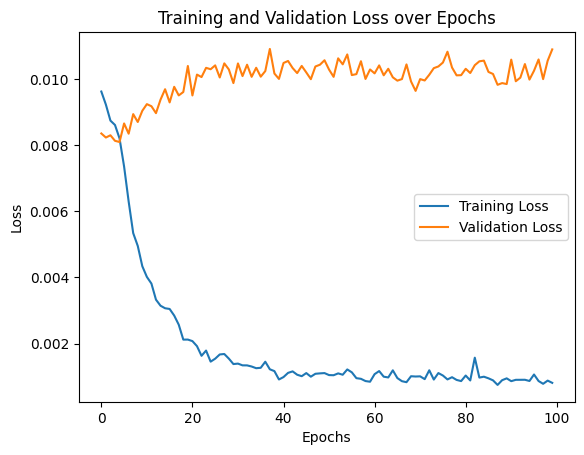

In [16]:

# Example unique IDs and types
unique_ids = [1, 2, 3, 4, 5, 6, 7]
unique_types = ["normal", "sachet", "raye_hor", "raye_ver", "disco"]

# Mapping for one-hot encoding
id_to_index = {id_: idx for idx, id_ in enumerate(unique_ids)}
type_to_index = {type_: idx for idx, type_ in enumerate(unique_types)}

# One-hot encode a single Candy object
def one_hot_encode_candy(candy):
    id_one_hot = np.zeros(len(unique_ids))
    type_one_hot = np.zeros(len(unique_types))
    id_one_hot[id_to_index[candy.id]] = 1
    type_one_hot[type_to_index.get(candy.type, 0)] = 1  # Default to first index if type missing
    return np.concatenate([id_one_hot, type_one_hot])

# Convert a 7x7 grid of Candy objects to a numerical 3D array
def preprocess_board(board):
    grid_size = (7, 7)
    encoded_board = np.zeros((*grid_size, len(unique_ids) + len(unique_types)))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            encoded_board[i, j, :] = one_hot_encode_candy(board[i][j])
    return encoded_board

class CandyDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.min_score = dataframe['score'].min()
        self.max_score = dataframe['score'].max()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        board = self.dataframe.iloc[idx, 0]  # Board state
        score = self.dataframe.iloc[idx, 1]  # Score
        normalized_score = (score - self.min_score) / (self.max_score - self.min_score)  # Min-Max normalization
        processed_board = preprocess_board(board)
        return torch.tensor(processed_board, dtype=torch.float32), torch.tensor(normalized_score, dtype=torch.float32)

class CandyCNN(nn.Module):
    def __init__(self):
        super(CandyCNN, self).__init__()
        in_channels = len(unique_ids) + len(unique_types)  # Total channels from encoding
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout layers after the convolutional layers
        self.dropout_conv = nn.Dropout2d(p=0.15)  # Dropout on convolutional feature maps
        
        # Calculate the size after convolutions and pooling
        self._calculate_fc_input_size()

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(self.fc_input_size, 128)  # Adjusted input size
        self.dropout_fc = nn.Dropout(p=0.3)  # Dropout after the first fully connected layer
        self.fc2 = nn.Linear(128, 1)

    def _calculate_fc_input_size(self):
        # Dummy input to calculate output size after convolutions and pooling
        dummy_input = torch.zeros(1, len(unique_ids) + len(unique_types), 7, 7)
        x = self.pool(torch.relu(self.conv1(dummy_input)))
        x = self.pool(torch.relu(self.conv2(x)))
        self.fc_input_size = np.prod(x.size()[1:])  # Flattened size after pooling

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout_conv(x)  # Apply dropout to convolutional feature maps
        x = x.view(x.size(0), -1)  # Flatten for FC layer
        x = torch.relu(self.fc1(x))
        x = self.dropout_fc(x)  # Apply dropout to the first fully connected layer
        x = self.fc2(x)
        return x
    
    
# Modified training function to track training and validation loss
def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, epochs=10):
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs.permute(0, 3, 1, 2))  # Adjust dimensions to (N, C, H, W)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        
        avg_train_loss = running_train_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()  # Set the model to evaluation mode
        running_val_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation during validation
            for inputs, targets in val_dataloader:
                outputs = model(inputs.permute(0, 3, 1, 2))  # Adjust dimensions to (N, C, H, W)
                loss = criterion(outputs.squeeze(), targets)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)

        # Print the losses
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
    
    # Plot training and validation losses
    plt.plot(range(epochs), train_losses, label='Training Loss')
    plt.plot(range(epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.show()

# Create dataset
dataset = CandyDataset(df)

# Calculate the size of the training and validation sets (80% train, 20% val)
train_size = int(0.7 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation

# Split dataset into train and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize model, loss, and optimizer
model = CandyCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
# Train the model with loss tracking and plotting
train_model(model, train_dataloader, val_dataloader, criterion, optimizer, epochs=100)

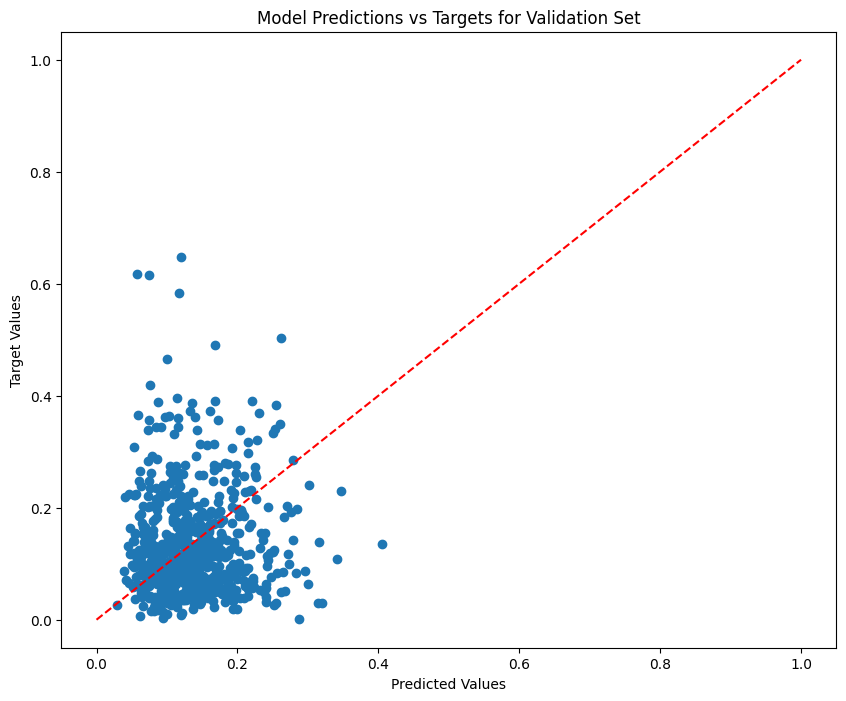

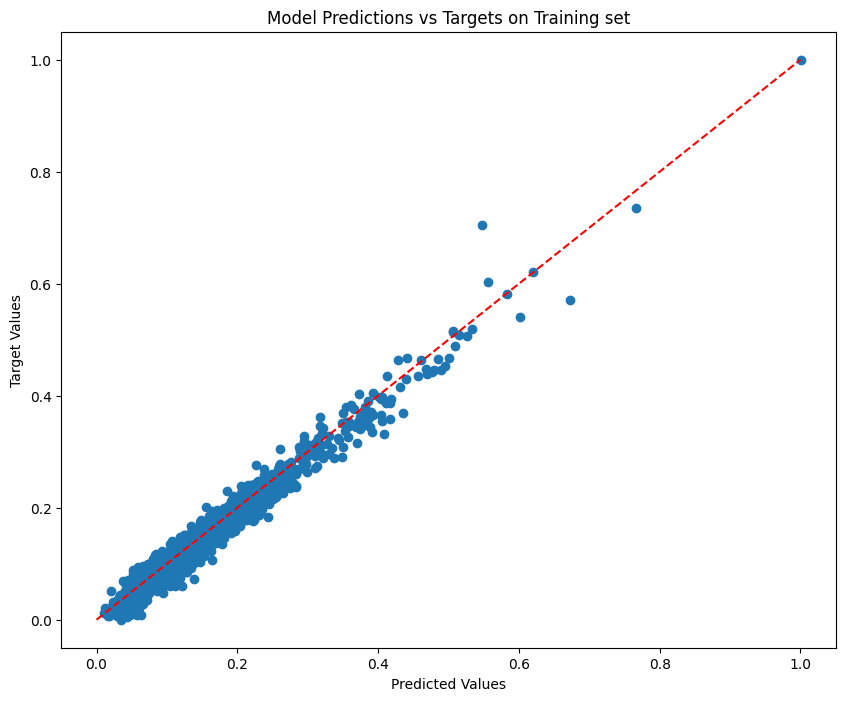

In [17]:
import matplotlib.pyplot as plt

# Show the prediction on the validation set
model.eval()
with torch.no_grad():
    inp = []
    tar = []
    for inputs, targets in val_dataloader:
        outputs = model(inputs.permute(0, 3, 1, 2))
        inp.extend(outputs.squeeze().numpy().flatten())
        tar.extend(targets.squeeze().numpy().flatten())

    plt.figure(figsize=(10, 8))
    plt.scatter(inp, tar)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title("Model Predictions vs Targets for Validation Set")
    plt.xlabel("Predicted Values")
    plt.ylabel("Target Values")
    plt.show()

import matplotlib.pyplot as plt

# Show the prediction on the validation set
model.eval()
with torch.no_grad():
    inp = []
    tar = []
    for inputs, targets in train_dataloader:
        outputs = model(inputs.permute(0, 3, 1, 2))
        inp.extend(outputs.squeeze().numpy().flatten())
        tar.extend(targets.squeeze().numpy().flatten())

    plt.figure(figsize=(10, 8))
    plt.scatter(inp, tar)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title("Model Predictions vs Targets on Training set")
    plt.xlabel("Predicted Values")
    plt.ylabel("Target Values")
    plt.show()

In [84]:
len(train_dataloader)

61

In [83]:
len(val_dataloader)

16

In [ ]:
# Plo

In [39]:
import numpy as np

# Assume we know all unique IDs and types
unique_ids = [1, 2, 3, 4, 5, 6]
unique_types = ["normal", "striped", "wrapped", "disco"]
id_to_index = {id_: idx for idx, id_ in enumerate(unique_ids)}
type_to_index = {type_: idx for idx, type_ in enumerate(unique_types)}

# One-hot encode a single Candy object
def one_hot_encode_candy(candy):
    id_one_hot = np.zeros(len(unique_ids))
    type_one_hot = np.zeros(len(unique_types))
    id_one_hot[id_to_index[candy.id]] = 1
    type_one_hot[type_to_index.get(candy.type, 0)] = 1  # Default to first index if type missing
    return np.concatenate([id_one_hot, type_one_hot])

# Convert a 7x7 grid of Candy objects to a numerical 3D array
def preprocess_board(board):
    grid_size = (7, 7)
    encoded_board = np.zeros((*grid_size, len(unique_ids) + len(unique_types)))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            encoded_board[i, j, :] = one_hot_encode_candy(board[i][j])
    return encoded_board

In [40]:
processed_board = preprocess_board(b)
print("Processed Board Shape:", processed_board.shape)  # (7, 7, N + M)


Processed Board Shape: (7, 7, 10)
